In [36]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scinet_motor import model_new as nn
import scinet_motor.ed_motor as edm
import pandas as pd
from tqdm import *
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
series_length = 50
N = 20
L = 64000

In [6]:
net = nn.Network.from_saved('motor_speed_torque_50', change_params={'load_file': 'model_motor_speed_torque_50_epoch_965'})


{'latent_size': 4, 'input_size': 1, 'encoder_num_units': [100, 100], 'decoder_num_units': [100, 100], 'tot_epochs': 1000, 'name': 'motor_speed_torque_50', 'time_series_length': 50, 'euler_num_units': [], 'output_size': 2, 'load_file': 'model_motor_speed_torque_50_epoch_965'}
(?, 4)
INFO:tensorflow:Restoring parameters from C:\Users\z003zxuz\Documents\Thesis_Code\MasterThesis\tf_save/model_motor_speed_torque_50_epoch_965.ckpt
Loaded network from file model_motor_speed_torque_50_epoch_965


In [37]:
data, current, speed, torque = edm.create_motor_dataset(series_length, N, file_name='motor_speed_torque_test')

<IPython.core.display.Javascript object>


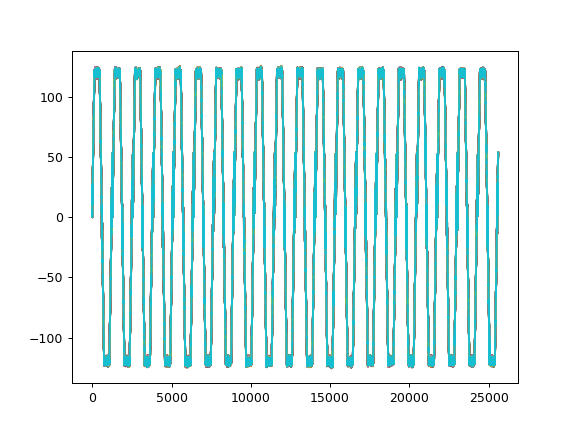

In [43]:
plt.plot(speed)

In [12]:
a = [1, 2, 3] + [np.zeros(49), np.zeros(49)]
np.expand_dims(np.array([1,2]), axis=0).shape

(1, 2)

In [ ]:
b = [np.expand_dims(data[1][0], axis=0) for x in range(series_length)]
speed_predicted = np.zeros((data[0].shape[0], series_length))

In [ ]:
for i in trange(data[0].shape[0]):
    data_input = [np.expand_dims(data[x][i, :], axis=0) for x in [0, 1, 2]]
    data_input[1][0][0] = b[series_length-1][0][0]
    data_input[1][0][1] = b[series_length-1][0][1]
    b = net.run(data_input, net.decoded_list)
    speed_predicted[i] = np.array([x[:, 0] for x in b]).ravel()

In [ ]:
speed_given = np.empty((L, 1))
speed_given[:] = np.nan
for i, speed_i in enumerate(speed[:L//series_length, 0]):
    speed_given[i*series_length] = speed_i
current_given = np.empty((L, 1))
current_given[:] = np.nan
for i, current_i in enumerate(current[:L//series_length, 0]):
    current_given[i*series_length] = current_i
speed_actual = speed.ravel()[:L]
torque_actual = torque.ravel()[:L]
# speed_predicted = np.transpose(np.array([x[:, 0] for x in b])).ravel()[:L]
speed_predicted = speed_predicted.ravel()[:L]
torque_predicted = np.transpose(np.array([x[:, 1] for x in b])).ravel()[:L]

In [ ]:
# blue_color='#000cff'
# orange_color='#ff7700'
# tt_given = np.linspace(0, 1, 64000)
# fig = plt.figure(figsize=(3.4, 2.1))
# ax = fig.add_subplot(111)
# ax.plot(tt_given, speed_actual, color=orange_color, label='True time evolution')
# # ax.plot(tt_given, speed_Predicted, '--', color=blue_color, label='Predicted time evolution')
# # ax.plot(tt_given, speed_given, 'o', color='c', label='Predicted time evolution')
# ax.plot(tt_given, current_given, 'x', color='k', label='Current')
# ax.set_ylabel(r'$x$ [$m$]')
# handles, labels = ax.get_legend_handles_labels()
# lgd=ax.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.6, 1.3), shadow=True, ncol=1)
# fig.tight_layout()
# plt.show()


In [ ]:
print(speed_actual.shape)
print(speed_predicted.shape)
print(current_given.shape)
print(speed_given)

In [ ]:
tt_given = np.linspace(0, 4, L)

time_series_plot = 500
plt.subplot(3,1,1)
plt.plot(tt_given[:time_series_plot], speed_actual[:time_series_plot], 'r', label = 'Actual')
plt.plot(tt_given[:time_series_plot], speed_predicted[:time_series_plot], 'b', label = 'Predicted')
plt.legend(loc='upper right')
plt.xlabel('time(seconds)')
plt.title('Speed predicted vs actual')
plt.subplot(3,1,2)
plt.plot(tt_given[:time_series_plot], current_given[:time_series_plot], 'xr')
plt.xlabel('time(seconds)')
plt.title('Current given')
plt.subplot(3,1,3)
plt.plot(tt_given[:time_series_plot], speed_given[:time_series_plot], 'or')
plt.xlabel('time(seconds)')
plt.title('Speed given')
plt.tight_layout()


In [38]:
b = net.run(data, net.decoded_list)

In [39]:
speed_given = np.empty((L, 1))
speed_given[:] = np.nan
for i, speed_i in enumerate(speed[:L//series_length, 0]):
    speed_given[i*series_length] = speed_i
current_given = np.empty((L, 1))
current_given[:] = np.nan
for i, current_i in enumerate(current[:L//series_length, 0]):
    current_given[i*series_length] = current_i
torque_given = np.empty((L, 1))
torque_given[:] = np.nan
for i, torque_i in enumerate(torque[:L//series_length, 0]):
    torque_given[i*series_length] = torque_i
speed_actual = speed.ravel()[:L]
torque_actual = torque.ravel()[:L]
speed_predicted = np.transpose(np.array([x[:, 0] for x in b])).ravel()[:L]
torque_predicted = np.transpose(np.array([x[:, 1] for x in b])).ravel()[:L]

In [40]:
time_series_plot = 5000

In [41]:
rmse = sqrt(mean_squared_error(speed_actual[:time_series_plot], speed_predicted[:time_series_plot]))
print("RMSE Error is " + str(rmse))

RMSE Error is 1.8547883441516437


In [42]:
rmse = sqrt(mean_squared_error(torque_actual[:time_series_plot], torque_predicted[:time_series_plot]))
print("RMSE Error is " + str(rmse))

RMSE Error is 0.9370364256307724


<IPython.core.display.Javascript object>


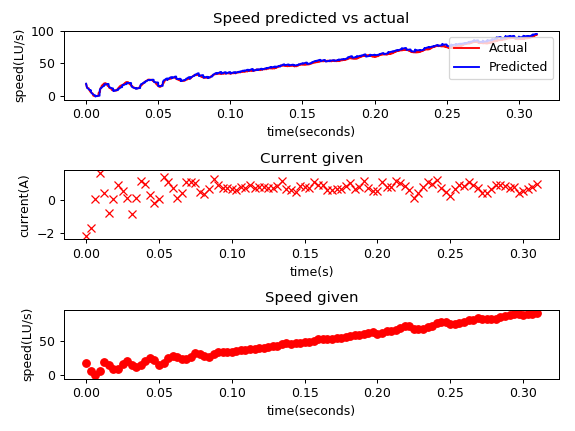

In [10]:
tt_given = np.linspace(0, 4, L)

time_series_plot = 5000
plt.subplot(3,1,1)
plt.plot(tt_given[:time_series_plot], speed_actual[:time_series_plot], 'r', label = 'Actual')
plt.plot(tt_given[:time_series_plot], speed_predicted[:time_series_plot], 'b', label = 'Predicted')
plt.legend(loc='upper right')
plt.xlabel('time(seconds)')
plt.ylabel('speed(LU/s)')
plt.title('Speed predicted vs actual')
plt.subplot(3,1,2)
plt.plot(tt_given[:time_series_plot], current_given[:time_series_plot], 'xr')
plt.xlabel('time(s)')
plt.ylabel('current(A)')
plt.title('Current given')
plt.subplot(3,1,3)
plt.plot(tt_given[:time_series_plot], speed_given[:time_series_plot], 'or')
plt.xlabel('time(seconds)')
plt.ylabel('speed(LU/s)')
plt.title('Speed given')
plt.tight_layout()

<IPython.core.display.Javascript object>


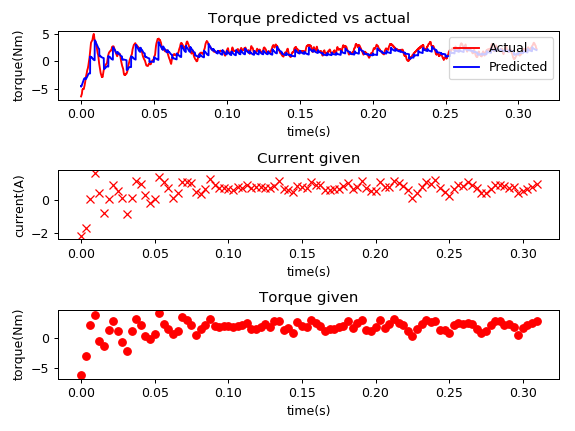

In [11]:
tt_given = np.linspace(0, 4, L)

time_series_plot = 5000
plt.subplot(3,1,1)
plt.plot(tt_given[:time_series_plot], torque_actual[:time_series_plot], 'r', label = 'Actual')
plt.plot(tt_given[:time_series_plot], torque_predicted[:time_series_plot], 'b', label = 'Predicted')
plt.legend(loc='upper right')
plt.xlabel('time(s)')
plt.ylabel('torque(Nm)')
plt.title('Torque predicted vs actual')
plt.subplot(3,1,2)
plt.plot(tt_given[:time_series_plot], current_given[:time_series_plot], 'xr')
plt.xlabel('time(s)')
plt.ylabel('current(A)')
plt.title('Current given')
plt.subplot(3,1,3)
plt.plot(tt_given[:time_series_plot], torque_given[:time_series_plot], 'or')
plt.xlabel('time(s)')
plt.ylabel('torque(Nm)')
plt.title('Torque given')
plt.tight_layout()

<IPython.core.display.Javascript object>


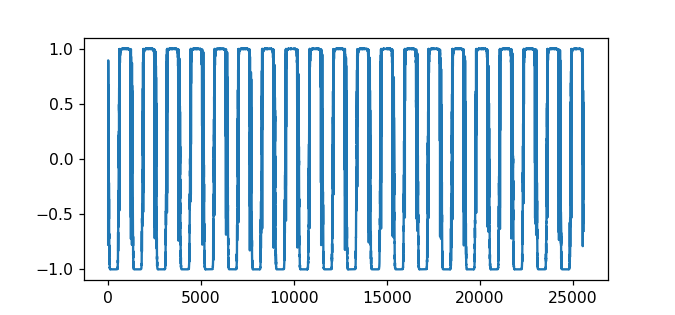

(25600,)


In [6]:
layer = net.state_means
fig = plt.figure(figsize=(6.0, 2.8))
fig.tight_layout()
out = np.array(net.run(data, layer))
Z = out[:,1]
print(Z.shape)
plt.plot(Z)
plt.show()
#     ax = fig.add_subplot('12{}'.format(i+1), projection='3d')
#     ax.view_init(20, 60)
#     surf = ax.plot_surface(Z, rstride=1, cstride=1, cmap=cm.inferno, linewidth=0)

In [1]:
def plot_latent_space(net, series_length=20, delta_t=7, steps=50):
    layer = net.state_means
    fig = plt.figure(figsize=(6.0, 2.8))
    fig.tight_layout()
    out = np.array(net.run(data, layer))
    for i in range(len(out[0])):
        zs = out[:, i]
        ax = fig.add_subplot('12{}'.format(i+1), projection='3d')
        ax.view_init(20, 60)
        Z = np.reshape(zs, S.shape)
        surf = ax.plot_surface(S, M, Z, rstride=1, cstride=1, cmap=cm.inferno, linewidth=0)
#         ax.set_xlabel(r'$\phi_S$')
#         ax.set_ylabel(r'$\phi_M$')
#         ax.set_zlabel('Latent activation {}'.format(i + 1))
#         ax.set_xticks([0, np.pi, 2*np.pi])
#         ax.set_yticks([0, np.pi, 2*np.pi])
#         ax.set_xticklabels(['0', r'$\pi$', r'$2 \pi$'])
#         ax.set_yticklabels(['0', r'$\pi$', r'$2 \pi$'])
    return fig

In [ ]:
%matplotlib tk
fig = copernicus_phi(net, series_length=50)